In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML-Revision/Datasets/train-MNIST.csv')

In [5]:
df.shape

(42000, 785)

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6466,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import matplotlib.pyplot as plt

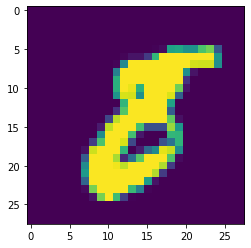

In [12]:
plt.imshow(df.iloc[6466,1:].values.reshape(28,28))

In [13]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [14]:
# Train-Test split
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=127)

In [16]:
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [17]:
# Making the data Mean centric
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [18]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [19]:
X_train[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [21]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [22]:
X_train_trf.shape

(33600, 784)

In [23]:
# Visualizing the data 
# Into 2-Dimensions

pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [24]:
X_train_trf[0:5]

array([[ 0.79397238,  1.27158032],
       [-4.14361202,  4.01012396],
       [-7.41708491, -0.59883676],
       [10.82715919, -5.81971434],
       [-7.99911289, -1.75388316]])

In [25]:
import plotly.express as px
y_train_new = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_new,
                 color_discrete_sequence=px.colors.qualitative.G10)

fig.show()



In [26]:
y_train_new

16221    9
37005    4
23362    4
3125     6
3007     1
        ..
39837    3
27684    7
17500    8
866      1
24636    7
Name: label, Length: 33600, dtype: object

In [27]:
# Visualizing the data 
# Into 3-Dimensions

pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [28]:
X_train_trf

array([[ 0.79398814,  1.27146144, -7.88684667],
       [-4.14351136,  4.00998093, -2.00833541],
       [-7.41700756, -0.5984376 ,  1.37351969],
       ...,
       [-1.24407213,  3.06348465,  2.10999895],
       [-8.34444802, -0.80653446,  2.57058711],
       [-5.51283815,  5.20105408, -3.64613013]])

In [29]:
y_train_new = y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 z=X_train_trf[:,2],
                 color=y_train_new)

fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
#Checking accuracy without PCA

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9346428571428571


In [34]:
# Checking the accuracy for each n_components
count=0
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(i,"---->",accuracy_score(y_test,y_pred))
    count = count+1

    if count==25:
      break
    

1 ----> 0.24928571428571428
2 ----> 0.32321428571428573
3 ----> 0.5103571428571428
4 ----> 0.6580952380952381
5 ----> 0.7338095238095238
6 ----> 0.8265476190476191
7 ----> 0.8408333333333333
8 ----> 0.8660714285714286
9 ----> 0.8832142857142857
10 ----> 0.9053571428571429
11 ----> 0.9142857142857143
12 ----> 0.919047619047619
13 ----> 0.925952380952381
14 ----> 0.93
15 ----> 0.9336904761904762
16 ----> 0.934404761904762
17 ----> 0.9351190476190476
18 ----> 0.9382142857142857
19 ----> 0.9404761904761905
20 ----> 0.9402380952380952
21 ----> 0.940595238095238
22 ----> 0.9415476190476191
23 ----> 0.9425
24 ----> 0.9452380952380952
25 ----> 0.9451190476190476


In [35]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

print(pca.explained_variance_)  #Eigen values
print(pca.explained_variance_ratio_) #variance ratio of lambda(eigen values)

[40.7626928  29.17851234 26.68673241]
[0.05798219 0.04150447 0.03796008]


In [36]:
pca.components_

array([[ 1.42786576e-18,  6.37502338e-20, -1.30127684e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.33739342e-16,  8.27426337e-18, -3.97476315e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.29379506e-17,  7.61724262e-18, -5.75795309e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [37]:
pca.components_.shape

(3, 784)

In [38]:
#Optimum Number of principle components required
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [39]:
pca.explained_variance_.shape

(784,)

In [40]:
pca.components_.shape #784 vectors in 784 dimensional space

(784, 784)

In [41]:
pca.explained_variance_ratio_[:50]

array([0.05798219, 0.04150447, 0.03796008, 0.02967752, 0.02582978,
       0.02246222, 0.01973025, 0.01785551, 0.01576125, 0.01442929,
       0.01372161, 0.01231729, 0.01148316, 0.01116596, 0.01060539,
       0.01014139, 0.00961903, 0.00940698, 0.00911314, 0.00889928,
       0.00843076, 0.00812668, 0.0077438 , 0.00759878, 0.00737052,
       0.00704011, 0.00693235, 0.00673735, 0.00631515, 0.00626504,
       0.0061763 , 0.00602087, 0.00587491, 0.00575864, 0.00570496,
       0.00561131, 0.0054752 , 0.00532607, 0.00526396, 0.00508083,
       0.0048955 , 0.00487338, 0.0047299 , 0.00462483, 0.00453153,
       0.00449866, 0.00445006, 0.00437825, 0.0043439 , 0.00430369])

In [42]:
np.cumsum(pca.explained_variance_ratio_) # We need 90% of variance covered(Thumb rule)

array([0.05798219, 0.09948666, 0.13744675, 0.16712427, 0.19295404,
       0.21541627, 0.23514652, 0.25300203, 0.26876328, 0.28319257,
       0.29691418, 0.30923146, 0.32071463, 0.33188058, 0.34248597,
       0.35262737, 0.36224639, 0.37165338, 0.38076652, 0.3896658 ,
       0.39809656, 0.40622324, 0.41396704, 0.42156582, 0.42893633,
       0.43597644, 0.44290879, 0.44964614, 0.45596128, 0.46222632,
       0.46840262, 0.47442349, 0.4802984 , 0.48605704, 0.49176201,
       0.49737332, 0.50284852, 0.50817459, 0.51343854, 0.51851937,
       0.52341487, 0.52828826, 0.53301816, 0.53764298, 0.54217451,
       0.54667318, 0.55112323, 0.55550149, 0.55984539, 0.56414908,
       0.56837224, 0.57254981, 0.57665882, 0.58066694, 0.58465895,
       0.58859691, 0.59244246, 0.59620363, 0.5998964 , 0.60357991,
       0.60714991, 0.61066499, 0.61413361, 0.61757611, 0.62100137,
       0.62438993, 0.62773469, 0.63106573, 0.63430758, 0.63753539,
       0.64070677, 0.64383076, 0.64694126, 0.64999832, 0.65304

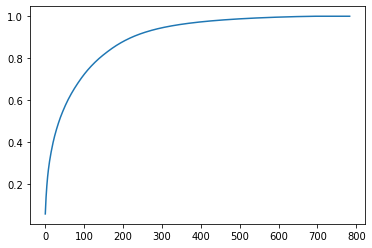

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [44]:
type(np.cumsum(pca.explained_variance_ratio_))

a = np.cumsum(pca.explained_variance_ratio_)

In [45]:
#Index numbers of variance ratio >0.90 | greater than 90%
np.where(a>0.90)[0]

array([223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
       249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
       262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287,
       288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300,
       301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313,
       314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326,
       327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339,
       340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352,
       353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365,
       366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378,
       379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391,
       392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 40

In [46]:
# From above, we took 223 as optimal number of components
pca = PCA(n_components=223)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
    
knn.fit(X_train_trf,y_train)
    
y_pred = knn.predict(X_test_trf)
    
print(accuracy_score(y_test,y_pred))

0.9433333333333334


Accuracy increased from 0.93 to 0.94 by applying PCA taking the optimal n_components